In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
df = pd.read_csv(r"C:\Users\surya\Downloads\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df1 = df.iloc[:,1:]

In [4]:
df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Finding the correlation

In [5]:
cor = df1.corr()

<Axes: >

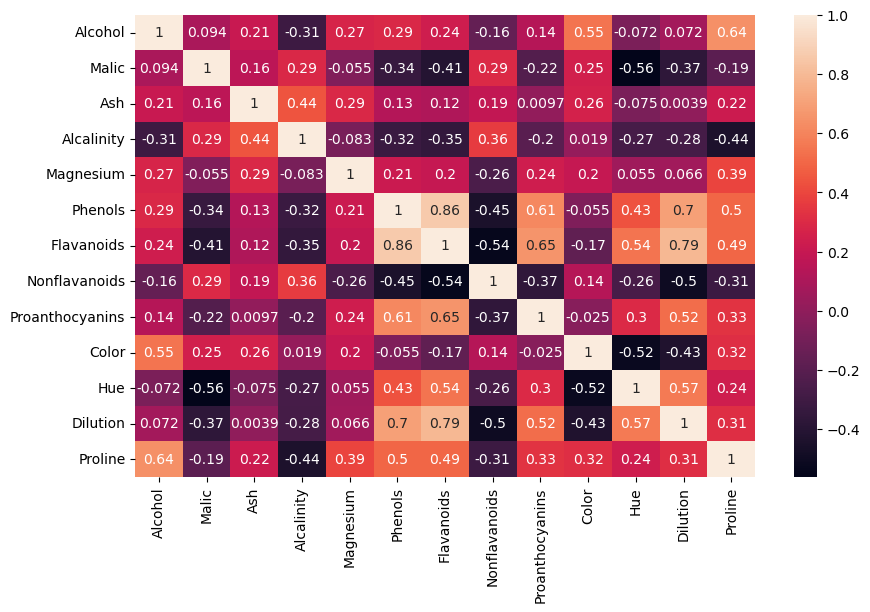

In [6]:
plt.figure(figsize= (10,6))
sns.heatmap(cor,annot=True)

We can observe that there are so many variables which are correlated to each other, but we cannot make predictions using so many features. So we try to reduce the dimensions.

### Standardize the data

In [7]:
nor = StandardScaler()
scaled_data = nor.fit_transform(df1)
scaled_data = pd.DataFrame(scaled_data)

### Using the PCA technique we try to reduce the dimensions of our data

In [8]:
pca = PCA(n_components=13)

In [9]:
model = pca.fit_transform(scaled_data)

In [10]:
var = pca.explained_variance_ratio_
var #Variance of the each feature in the data.

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

As we can see first 3 columns have high variance when compared to remaining variables, so we try to consider this columns to build our clustering model.

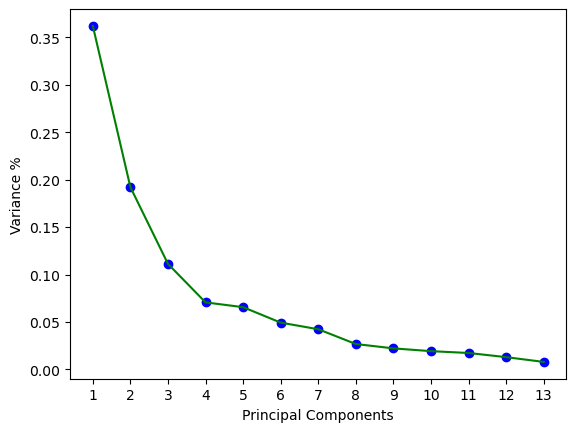

In [12]:
#Plotting the variances on the graph
plt.scatter(range(1,14), pca.explained_variance_ratio_, color='blue')
plt.plot(range(1,14), pca.explained_variance_ratio_, 'g-')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(range(1,14))
plt.show()

In [13]:
PCA_components = pd.DataFrame(model)

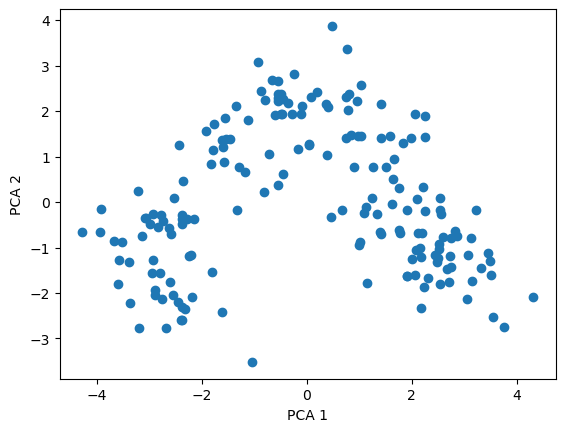

In [14]:
plt.scatter(PCA_components[0], PCA_components[1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [15]:
#Calculating inertias of clusters
w=[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3])
    w.append(kmeans.inertia_)

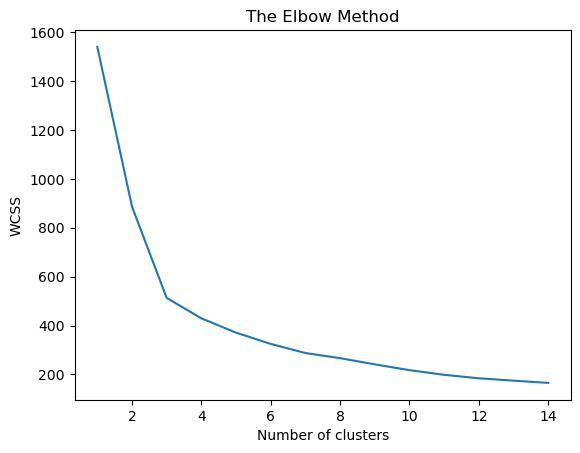

In [16]:
#Plotting the inertias on the graph
plt.plot(range(1, 15), w)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see for 3 clusters we have a efficient inertia. So we try to build a clustering model which have 3 clusters.

### KMeans Clstering 

In [17]:
Kmodel = KMeans(n_clusters=3)
Kmodel.fit(PCA_components.iloc[:,:3])

KMeans(n_clusters=3)

In [18]:
labels = Kmodel.predict(PCA_components.iloc[:,:3])

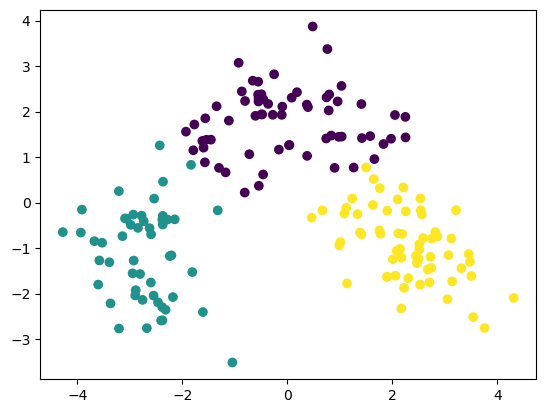

In [19]:
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

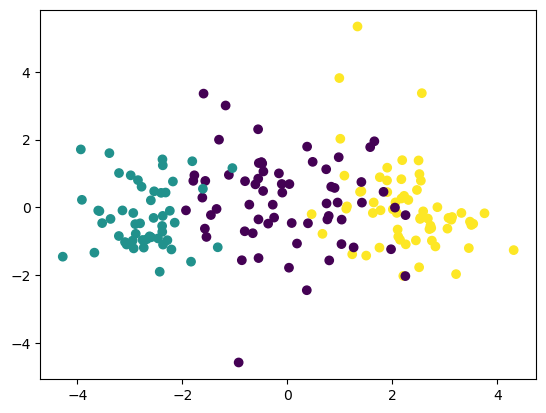

In [20]:
plt.scatter(PCA_components[0], PCA_components[2], c=labels)
plt.show()

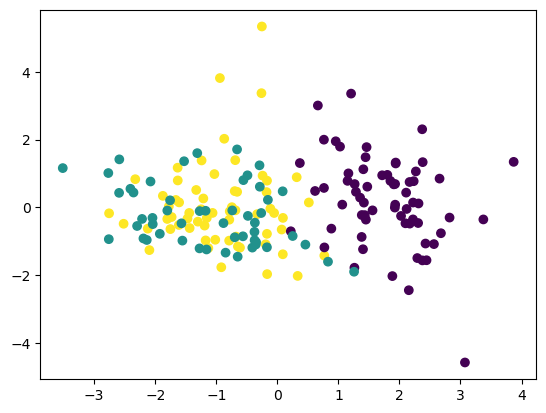

In [21]:
plt.scatter(PCA_components[1], PCA_components[2], c=labels)
plt.show()

### Building Clustering Model for the original standarized data

In [22]:
Kmodel1=KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
Kmodel1.fit(scaled_data.iloc[:,:3])

KMeans(n_clusters=3, random_state=42)

In [23]:
labels1 = Kmodel.predict(scaled_data.iloc[:,:3])
labels1

array([2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0])

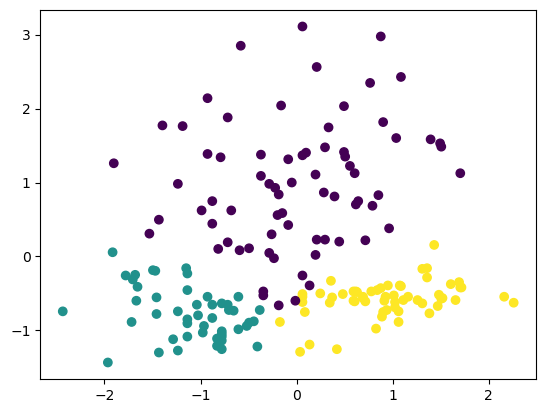

In [24]:
plt.scatter(scaled_data[0], scaled_data[1], c=labels1)
plt.show()

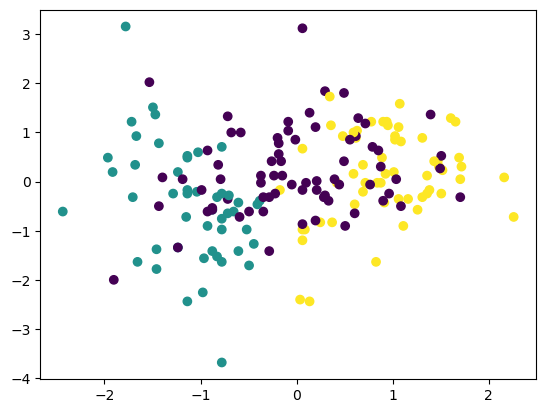

In [25]:
plt.scatter(scaled_data[0], scaled_data[2], c=labels1)
plt.show()

When we observe the graphs of original data anta dimensionality reduced data, we can clear observe the clusters 
are sepearated clearly, but whereas in the original data the data points are of other clusters are mixed with other cluster. So the PCA model performs well.

In [26]:
df1['KM']=Kmodel.labels_

In [27]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KM
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [28]:
df1.groupby(df1.KM).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
KM,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


### Hierarchical Clustering - Agglomerative Clustering

In [29]:
#Building a model based on complete linkage using manhattan distance
model2 = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')
model2

AgglomerativeClustering(affinity='manhattan', linkage='complete', n_clusters=3)

In [30]:
hier= model2.fit(PCA_components.iloc[:,:3])

In [31]:
labels2 = model2.labels_

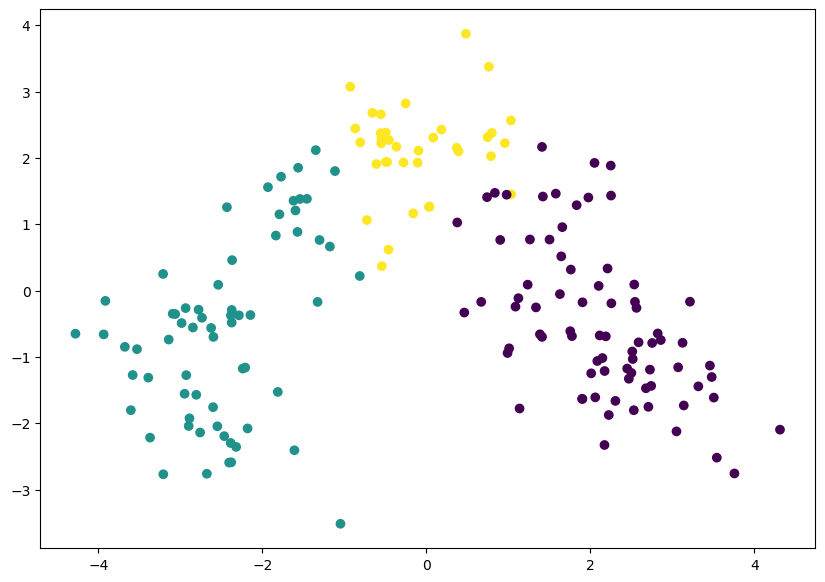

In [32]:
plt.figure(figsize=(10, 7))  
plt.scatter(PCA_components[0],PCA_components[1], c=labels2) 

In [33]:
df1['H'] = model2.labels_

In [34]:
df1.groupby(df1.H).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KM
H,,,,,,,,,,,,,,
0,13.399481,1.984416,2.423636,17.797403,106.246753,2.839091,2.936104,0.287792,2.000649,5.056234,1.064675,3.130649,998.363636,1.610390
1,12.941538,3.076615,2.418462,21.215385,97.538462,1.706154,0.986769,0.465846,1.182154,6.314462,0.756400,1.854615,604.584615,0.784615
2,12.254167,1.752500,2.150556,20.019444,89.805556,2.195000,1.971944,0.332500,1.452500,2.793611,1.091111,2.868611,465.972222,0.000000


So by using the PCA we reduced the data dimensios from 13 to 3 columns, with around 66% of data from original data by losing some unnecesary or low variance data. This happens us to build a more accurate clustering model which is having 3 clusters.